### Câu hỏi: Loại thời tiết nào có tỉ lệ ô nhiễm cao ?

#### Import các thư viện cần thiết

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#### Đọc dữ liệu từ file

In [ ]:
# Đường dẫn file CSV
file_path = "ProcessedData.csv"

# Đọc dữ liệu từ file CSV
data = pd.read_csv(file_path)

#### Vẽ biểu đồ thể hiện tỉ lệ từng mức AQI và đường trung bình AQI đối với từng loại thời tiết

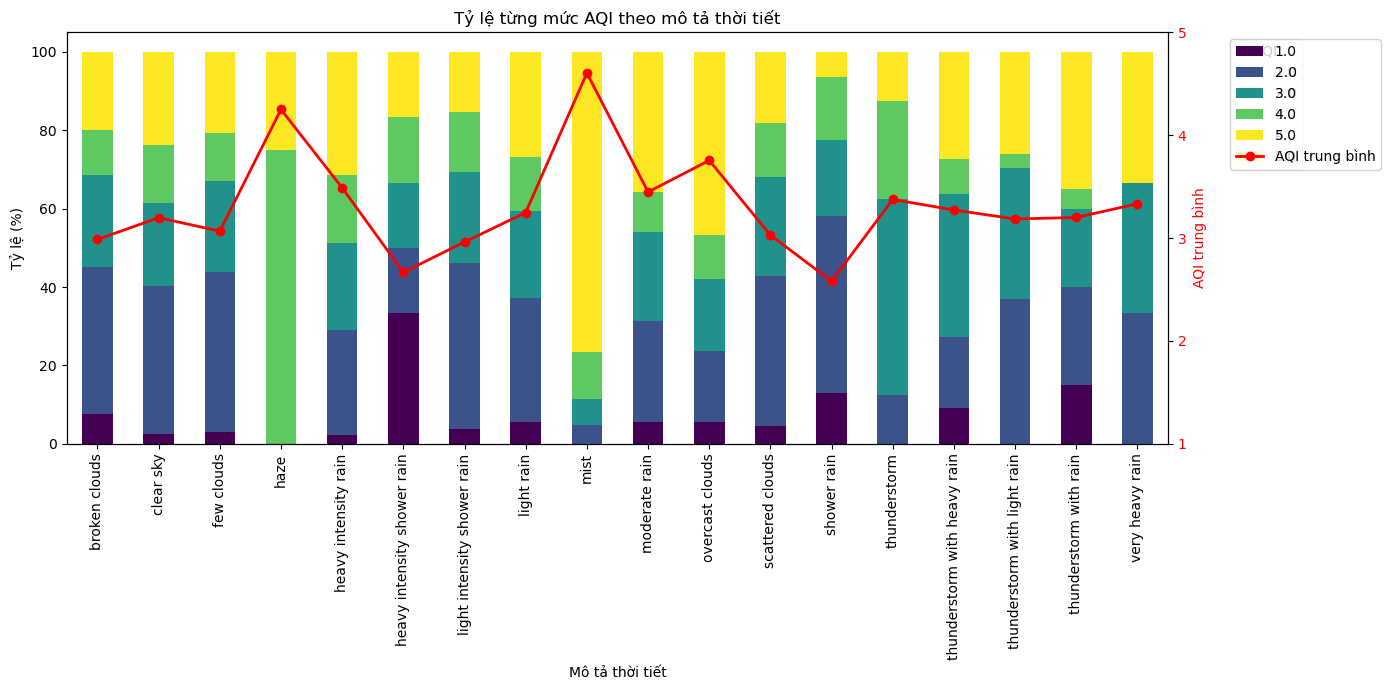

In [7]:
# Đếm số lượng từng giá trị 'aqi' theo 'weather description' và chuyển thành tỷ lệ
grouped_data = data.groupby(['Weather Description', 'aqi']).size().unstack(fill_value=0)
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Tính mức AQI trung bình theo 'weather description'
mean_aqi = data.groupby('Weather Description')['aqi'].mean()

# Vẽ biểu đồ cột chồng với tỷ lệ phần trăm
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title("Tỷ lệ từng mức AQI theo mô tả thời tiết")
plt.ylabel("Tỷ lệ (%)")
plt.xlabel("Mô tả thời tiết")
plt.legend(title="AQI", bbox_to_anchor=(1.05, 1), loc='upper left')

# Vẽ đường biểu diễn mức AQI trung bình
ax2 = ax.twinx()  # Tạo trục Y thứ hai để vẽ đường
ax2.plot(mean_aqi.index, mean_aqi.values, color='red', marker='o', linewidth=2, label='AQI trung bình')
ax2.set_ylabel("AQI trung bình", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Thiết lập giới hạn và thang đo cho trục Y phải
ax2.set_ylim(1, 5)  # Giới hạn từ 1 đến 5
ax2.set_yticks([1, 2, 3, 4, 5])  # Đặt các giá trị trên trục Y

# Thêm chú thích
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Tình trạng AQI ở các loại thời tiết khác nhau:
- Đường trung bình dao động rõ rệt theo từng loại thời tiết.
- "Clear sky" và "Few clouds": Phần lớn mức AQI nằm trong khoảng trung bình (màu xanh dương và xanh lá nhạt), cho thấy chất lượng không khí ở mức ổn định.
- "Mist" và "Haze": Các loại thời tiết này có tỷ lệ AQI cao hơn (màu vàng và xanh lá đậm), phản ánh mức độ ô nhiễm tăng, đặc biệt trong tình trạng sương mù hay khói bụi.
- "Rain" và "Thunderstorm": Thời tiết có mưa, đặc biệt là mưa càng lớn, mức AQI càng có xu hướng giảm (phần lớn AQI nằm ở các mức thấp hơn). Chúng ta có thể đặt ra giả thiết chất lượng không khí ở TPHCM thấp là do các loại bụi mịn

Ảnh hưởng của thời tiết lên AQI:

- Mưa dường như có vai trò làm sạch không khí, giảm các hạt bụi lơ lửng, dẫn đến AQI tốt hơn so với các loại thời tiết khô.
- Các trạng thái thời tiết như "Haze" (khói mù) hoặc "Mist" (sương mù) thường gắn liền với điều kiện ô nhiễm cao hơn, do hạt bụi hoặc hóa chất dễ bị tích tụ.

Đặc điểm nổi bật: TP.HCM thường xuyên có các ngày với mức AQI trung bình (màu xanh dương), điều này có thể phản ánh tác động tiêu cực của giao thông, công nghiệp và mật độ dân cư cao đến chất lượng không khí.
Tỷ lệ AQI cao (màu vàng) cũng xuất hiện thường xuyên, đặc biệt trong thời tiết tĩnh lặng hoặc khô ráo.

